In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import constants as const
plt.rcParams['text.usetex'] = True

#Sellmeier equation
def n_squared(lamb, coeffs):
    '''lamb in µm'''
    n2 = 1
    lsquare = lamb**2
    for index in range(3):
        n2 = n2 + coeffs[index, 0]*lsquare/(lsquare-coeffs[index, 1]**2)
    return n2

#Lensmaker equation
def lensmaker(n, R1, R2, d=0):
    '''Returns 1/focal length'''
    f_inv = (n-1)*(1/R1 - 1/R2 + (n-1)*d/(n*R1*R2))
    return f_inv

def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge



#https://refractiveindex.info/?shelf=glass&book=fused_silica&page=Malitson
#Maltison 1965 UV fused silica: 0.21 µm - 3.71 µm
coeffsUVFS = np.array([[0.6961663, 0.0684043], [0.4079426, 0.1162414], [0.8974794, 9.896161]])

#Energy range is 1.3 eV to 5 eV in .1 eV steps
energies = np.linspace(1.3, 5, 37)*const.elementary_charge
wavs = const.h*const.c/energies


fig1, axs1 = plt.subplots(1,1, layout='constrained', figsize = (6,4), dpi=200)
fig2, axs2 = plt.subplots(1,1, layout='constrained', figsize = (6,4), dpi=200)
#µm for sellmeier
n_wav = np.sqrt(n_squared(wavs*1e6, coeffsUVFS))
axs1.plot(wavs*1e9, n_wav)
axs1.set_ylabel('n / 1')
axs1.set_xlabel(r'$\lambda$ / nm')
axs1.set_xticks(np.arange(250, 951, 100))
secax0 = axs1.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax0.set_xticks([1.5, 2, 3, 4, 5])
secax0.set_xlabel("E / eV")

#second part with focal distance
focal_distance = lensmaker(n_wav, np.inf, 59.4)
focal_distance = 1/focal_distance
axs2.plot(wavs*1e9, -focal_distance)
axs2.set_ylabel('f / mm')
axs2.set_xlabel(r'$\lambda$ / nm')
axs2.set_xticks(np.arange(250, 951, 100))

secax1 = axs2.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax1.set_xticks([1.5, 2, 3, 4, 5])
secax1.set_xlabel("E / eV")

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#taken from edmund optics: Laser Optics and Resource Guide Section 2: Gaussian Beam Propagation

w_c = lambda w0, lamb, z: w0*np.sqrt(1+(lamb*z/(np.pi*w0**2))**2)
w0_c = lambda lamb, theta: lamb/np.pi/theta
zr_c = lambda lamb, w0: np.pi*w0**2/lamb

#collimated beam through lens with focal distance f
#taken from angular aperture
theta_c = lambda D, f: np.arctan(D/(2*f))



wav = 653e-9 # nm
#https://refractiveindex.info/?shelf=glass&book=fused_silica&page=Malitson
#Maltison 1965 UV fused silica: 0.21 µm - 3.71 µm
coeffsUVFS = np.array([[0.6961663, 0.0684043], [0.4079426, 0.1162414], [0.8974794, 9.896161]])
n = np.sqrt(n_squared(wav*1e6,coeffsUVFS))
f = 1/lensmaker(n, 59.4, np.inf)*1e-3

diameters = np.array([1, 2, 3, 4])*1e-3 # mm
thet = theta_c(diameters, f)
w0 = w0_c(wav, thet)
#print(w0*2)

zr = zr_c(wav, w0[1])

z = np.linspace(-1e-3, zr/2, 200)

plt.figure()
#plt.tight_layout()
fig1, axs1 = plt.subplots(1,1, layout='constrained', figsize = (6,4), dpi=200)
fig2, axs2 = plt.subplots(1,1, layout='constrained', figsize = (6,4), dpi=200)
#fig.suptitle("653 nm beam waist")
for index in range(len(diameters)):
    axs1.plot(z*1e3, w_c(w0[index], wav, z)*2e6, label="%.1f mm" %(diameters[index]*1e3))
axs1.set_xlabel("z / mm")
axs1.set_ylabel("beam waist / µm")
axs1.legend()

z = np.linspace(-2e-4, zr/4, 200)


for index in range(len(diameters)):
    axs2.plot(z*1e3, 1/(w_c(w0[index], wav, z)/w0[index])**2, label="%.1f mm" %(diameters[index]*1e3))
axs2.set_xlabel("z / mm")
axs2.set_ylabel("relative maximum intensity / a.u.")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#taken from edmund optics: Laser Optics and Resource Guide Section 2: Gaussian Beam Propagation

w_c = lambda w0, lamb, z: w0*np.sqrt(1+(lamb*z/(np.pi*w0**2))**2)
w0_c = lambda lamb, theta: lamb/np.pi/theta
zr_c = lambda lamb, w0: np.pi*w0**2/lamb

#collimated beam through lens with focal distance f
#taken from angular aperture
theta_c = lambda D, f: np.arctan(D/(2*f))


dia = 2.5e-3 # m
wavs = np.array([250,300, 400, 500, 600, 700, 800, 900])*1e-9 #wavs in m
n = np.sqrt(n_squared(wav*1e6,coeffsUVFS))
f = 1/lensmaker(n, 59.4, np.inf)*1e-3
thet = theta_c(dia, f)
w0 = w0_c(wavs, thet)

zr = np.max(zr_c(wavs, w0))

z = np.linspace(-2e-4, zr/4, 200)

plt.figure()
fig1, axs1 = plt.subplots(1,1, layout='constrained', figsize = (6,4), dpi=200)
#plt.title("Beam waist vs wavelength behavior at 2 mm collimated waist")
for index in range(len(wavs)):
    axs1.plot(z*1e3, w_c(w0[index], wavs[index], z)*2e6, label="%.1f nm" %(wavs[index]*1e9))
axs1.set_xlabel("z / mm")
axs1.set_ylabel("beam waist / µm")
plt.legend()



plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True

def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def gaussProd(x, sig1, sig2, mu1, mu2):
    mu_n = (mu1*sig2**2 + mu2*sig1**2)/(sig1**2 + sig2**2)
    sig_n = sig1*sig2/np.sqrt(sig1**2 + sig2**2)
    return 1/(np.sqrt(2*np.pi)*sig_n)*np.exp(-(x-mu_n)**2/(2*sig_n**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))



def plotVisGaussians(x, sig2, dmu):
    plt.figure()
    #probe
    plt.plot(x, gaussian(x, 1, -dmu/2), label = r"probe: $\sigma$ = 1; $\mu = %.1f$" %(-dmu/2))
    #pump
    plt.plot(x, gaussian(x, 2, +dmu/2), label = r"pump: $\sigma$ = %d; $\mu = %.1f$" %(sig2, dmu/2))
    #overlap
    plt.plot(x, gaussProd(x, 1, sig2, -dmu/2, dmu/2), "r--", label = r"overlap")
    plt.legend()
    plt.xlabel(r"x / $\sigma$")
    plt.ylabel(r"I / a.u.")
    plt.title(r"C = %.2e" %(cFactor(sig2, 1, dmu,0)))
    plt.show()

#case 1 µ1 = µ2, sig 1 >> sig 2
#
sig2 = 1 #times sig 1; sig2 is pump
dmu = 0 

x = np.linspace(-3, 3, 200)
plotVisGaussians(x, sig2, dmu)

sig2 = 2 #times sig 1
dmu = 0 

plotVisGaussians(x, sig2, dmu)

sig2 = 1
dmu = 2*np.sqrt(2*np.log(2))*sig2 #FWHM as distance
plotVisGaussians(x, sig2, dmu)


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True

def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def gaussProd(x, sig1, sig2, mu1, mu2):
    mu_n = (mu1*sig2**2 + mu2*sig1**2)/(sig1**2 + sig2**2)
    sig_n = sig1*sig2/np.sqrt(sig1**2 + sig2**2)
    return 1/(np.sqrt(2*np.pi)*sig_n)*np.exp(-(x-mu_n)**2/(2*sig_n**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))



def plotVisGaussians(x, sig2, dmu):
    plt.figure()
    #probe
    plt.plot(x, gaussian(x, 1, -dmu/2), label = r"probe: $\sigma$ = 1; $\mu = %.1f$" %(-dmu/2))
    #pump
    plt.plot(x, gaussian(x, 2, +dmu/2), label = r"pump: $\sigma$ = %d; $\mu = %.1f$" %(sig2, dmu/2))
    #overlap
    plt.plot(x, gaussProd(x, 1, sig2, -dmu/2, dmu/2), "r--", label = r"overlap")
    plt.legend()
    plt.xlabel(r"x / $\sigma$")
    plt.ylabel(r"I / a.u.")
    plt.title(r"C = %.2e" %(cFactor(sig2, 1, dmu,0)))
    plt.show()

def plotCompareGaussians(x, sigPump, dmu_vec):
    fig = plt.figure()
    #plot pump gaussian
    plt.plot(x, gaussian(x, sigPump, 0))
    for ind in range(len(dmu_vec)):
        plt.plot(x, gaussian(x, 1, dmu_vec[ind]), label="C = %.3f" %cFactor(sigPump, 1, 0, dmu_vec[ind]))

    plt.legend()
    plt.show()
    fig.clear()

#case 1 µ1 = µ2, sig 1 >> sig 2
#
sig2 = 3 #times sig 1; sig2 is pump
dmu = 0 

x = np.linspace(-3, 3, 200)
dmu = [0, 0.1, 0.3, 0.5]
sigPump = 3
plotCompareGaussians(x, sigPump, dmu*sigPump)
sigPump = 2
plotCompareGaussians(x, sigPump, dmu*sigPump)
sigPump = 1
plotCompareGaussians(x, sigPump, dmu*sigPump)



In [ ]:
#Test binning of numerical correction factor
import numpy as np
from matplotlib import pyplot as plt
def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))

def binMap(map, xBinning, yBinning=0):
    '''N_binning means that N*N pixels are binned together\n
    only takes square z*z maps'''
    if yBinning == 0:
        yBinning = xBinning
    xBins = int(np.shape(map)[0]//xBinning) #along one axis
    yBins = int(np.shape(map)[1]//yBinning) #along one axis
    outmap = map.reshape(xBins, xBinning, yBins, yBinning).sum(3).sum(1)
    return outmap


#using identical gaussians for this
points_per_sig = 1024 #starting value 1000 points for 1 sig distance
sig = 1 #does not matter since I do binning in steps of sig at first
mu = 0
###----analytical cFactor ----###
cFactorAnalytic = cFactor(sig, sig, mu, mu)**2
print("Analytic correction factor:\n " + str(cFactorAnalytic))
###----numeric cFactor ----###
nsig = 5 # how far I measure to the sides
x_like = np.linspace(-nsig*sig,nsig*sig, nsig*points_per_sig)
Xvec, Yvec = np.array(np.meshgrid(x_like,x_like))


gaussStd = gaussian(Xvec, sig, mu)*gaussian(Yvec, sig, mu)


n_steps = 11
binning_steps=np.zeros(n_steps, dtype=int)

for i in range(n_steps):
    binning_steps[i] = 2**i
#print(binning_steps)

#first without added noise
print("Correction Factor numeric, no noise:")
noNoiseGaussCorrection = np.zeros(len(binning_steps))
for ind in range(len(binning_steps)):
    gaussBinned = binMap(gaussStd, binning_steps[ind])
    #pump = np.ones(np.shape(gaussBinned))
    pump = gaussBinned
    probe = gaussBinned
    denominator = np.sum(np.multiply(pump, probe)[:])
    constantPumpIntensity = np.max(pump)
    enumerator = np.sum(constantPumpIntensity*probe[:])
    #this is missing various constant factors, since this is not using the gaussian shape, but is discretized
    noNoiseGaussCorrection[ind] = enumerator/denominator
    print("binning = 1/"+str(binning_steps[ind])+": " + str(noNoiseGaussCorrection[ind]))

plt.figure(dpi = 200, figsize=(8,4))
plt.plot(np.linspace(n_steps-1,0,n_steps), noNoiseGaussCorrection, label = "no noise")
#with added noise
Noiselevels = [0.05,0.1,0.2]
NoiseGaussCorrection = np.zeros((len(Noiselevels), len(binning_steps)))
for indexSNR, SNR in enumerate(Noiselevels):

    gauss1 = gaussStd + (np.random.rand(np.shape(gauss1)[0], np.shape(gauss1)[1])-0.5)*np.max(gauss1)*SNR
    gauss2 = gaussStd + (np.random.rand(np.shape(gauss2)[0], np.shape(gauss2)[1])-0.5)*np.max(gauss2)*SNR
    
    for ind in range(len(binning_steps)):
        pump = binMap(gauss1, binning_steps[ind])
        probe = binMap(gauss2, binning_steps[ind])
        denominator = np.sum(np.multiply(pump, probe)[:])
        constantPumpIntensity = np.max(pump)
        enumerator = np.sum(constantPumpIntensity*probe[:])
        #this is missing various constant factors, since this is not using the gaussian shape, but is discretized
        NoiseGaussCorrection[indexSNR, ind] = enumerator/denominator
    plt.plot(np.linspace(n_steps-1,0,n_steps), NoiseGaussCorrection[indexSNR], label = "SNR = %.2f dB" %(10*np.log10(1/SNR)), linestyle='dashed')



plt.plot([0,n_steps-1], [2,2], label="analytical correction", linestyle="dotted", color = 'red')
plt.xlabel("log2 of discrete point density per sig")
plt.ylabel("Correction factor")
plt.ylim([1,3])
plt.legend()

In [ ]:
#Test binning of numerical correction factor
#Testing how the offset actually behaves
import numpy as np
from matplotlib import pyplot as plt
def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))

def binMap(map, xBinning, yBinning=0):
    '''N_binning means that N*N pixels are binned together\n
    only takes square z*z maps'''
    if yBinning == 0:
        yBinning = xBinning
    xBins = int(np.shape(map)[0]//xBinning) #along one axis
    yBins = int(np.shape(map)[1]//yBinning) #along one axis
    outmap = map.reshape(xBins, xBinning, yBins, yBinning).sum(3).sum(1)
    return outmap


#using identical gaussians for this
points_per_sig = 1024 #starting value 1000 points for 1 sig distance
sig = 1 #does not matter since I do binning in steps of sig at first
dmu = 1
###----analytical cFactor ----###
cFactorAnalytic = cFactor(sig, sig, dmu/2, -dmu/2)**2
print("Analytic correction factor:\n " + str(cFactorAnalytic))
###----numeric cFactor ----###
nsig = 5 # how far I measure to the sides
x_like = np.linspace(-nsig*sig,nsig*sig, nsig*points_per_sig)
Xvec, Yvec = np.array(np.meshgrid(x_like,x_like))


n_steps = 11
binning_steps=np.zeros(n_steps, dtype=int)
for i in range(n_steps):
    binning_steps[i] = 2**i

d_offset = [0,0.1,0.2,0.5]
GaussCorrection = np.zeros((len(d_offset),len(binning_steps)))
for indOffset, offset in enumerate(d_offset):

    gauss1 = gaussian(Xvec, sig, +dmu/2+offset)*gaussian(Yvec, sig, +dmu/2)
    gauss2 = gaussian(Xvec, sig, -dmu/2+offset)*gaussian(Yvec, sig, -dmu/2)


    for ind in range(len(binning_steps)):
        pump = binMap(gauss1, binning_steps[ind])
        probe = binMap(gauss2, binning_steps[ind])
        denominator = np.sum(np.multiply(pump, probe)[:])
        constantPumpIntensity = np.max(pump)
        enumerator = np.sum(constantPumpIntensity*probe[:])
        #this is missing various constant factors, since this is not using the gaussian shape, but is discretized
        GaussCorrection[indOffset, ind] = enumerator/denominator


plt.figure(dpi = 200, figsize=(8,4))
for i in range(len(d_offset)):
    plt.plot(np.linspace(n_steps-1,0,n_steps), GaussCorrection[i], label = "%.1f \sigma" %d_offset[i])
plt.plot([0,n_steps-1], [cFactorAnalytic,cFactorAnalytic], label="analytical correction", linestyle="dotted", color = 'red')
plt.xlabel("log2 of discrete point density per sig")
plt.ylabel("Correction factor")
plt.legend()

# Plotting of data

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
import numpy as np
plt.rcParams['text.usetex'] = True
font = {'size': 20}
plt.rc('font', **font)

umPerPx = 6.949
dumPerPx = 4E-2
dRelUmPerPx = dumPerPx/umPerPx

def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge

def paramDictatTime(param_dict, time_fs):
    return param_dict['A1']*np.exp(-time_fs/param_dict['tau1']) + param_dict['A2']*np.exp(-time_fs/param_dict['tau2'])
#import data from excel (terrible choice I know, but I want the visualisation and comparability)

def ErrorCorrectionConvoluted(signal, correctionFactor, peakRadiance, dRelUmPerPx, dRelPower):
    '''correctionfactor is already divided with peak radiance\\
    dRelPower = dPower/Power'''
    dPeakRadiance = dRelPower*peakRadiance + 2*peakRadiance*dRelUmPerPx
    return abs(signal*correctionFactor/peakRadiance*dPeakRadiance)

SHG_main = pd.read_excel("CorrectedPump653ProbeWavelengthScan_UV-extended.xlsx", sheet_name='2024WavelengthScan', skiprows=[0,1])
#print(SHG_main)
print(SHG_main.keys())

wavelengths = SHG_main['Probe wavelength / nm']
#simple correction without map
dOD_SHG_main = SHG_main['cor_dOD / (mOD*m^2/W)']
#correction with map
dOD_SHG_mapCorr = SHG_main['hypothetical correction']
dPumpPower = SHG_main['dRelPumpPower']
peakRad = SHG_main['Pump power density / (W/m^2)']



SHG_wav_timescan = pd.read_excel("CorrectedPump653ProbeWavelengthScan_UV-extended.xlsx", sheet_name = "2024WavelengthScanParameters", skiprows=[0,1])
scan_wavs = SHG_wav_timescan['Probe wavelength / nm']
scan_corrFactors = SHG_wav_timescan['Correction Factor / (W/m^2)^-1']
scan_params = {
    'A1' : SHG_wav_timescan['A1'],
    'A2' : SHG_wav_timescan['A2'],
    'tau1' : SHG_wav_timescan['tau1'],
    'tau2' : SHG_wav_timescan['tau2'],
}

times = np.array([1e2, 1e4, 2e4, 2e5])

print(ErrorCorrectionConvoluted(dOD_SHG_main, scan_corrFactors, peakRad, dRelUmPerPx, dPumpPower))

fig, ax = plt.subplots(1,1, figsize=(8,4), dpi = 200)
''''''
ax.plot(wavelengths, dOD_SHG_main, 'ro', label='standard correction', ls = "None")
ax.plot(wavelengths, dOD_SHG_mapCorr, 'bx', label='map corrected', ls = "None")
ax.errorbar(wavelengths, dOD_SHG_main, yerr = ErrorCorrectionConvoluted(dOD_SHG_main, scan_corrFactors, peakRad, dRelUmPerPx, dPumpPower), ls = "None", capsize =2)
'''
for ind, time in enumerate(times):
    ax.plot(scan_wavs, paramDictatTime(scan_params, time), '.', label=time)
'''
ax.set_xlabel('probe wavelength / nm')
ax.set_ylabel(r'$\mathrm{absorbance / mOD\cdot \frac{m^2}{W}}$')

ax.set_xticks(np.arange(300, 701, 50))
secax = ax.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax.set_xticks(np.round(wavToEnergy(np.array([440, 500, 653])), 2))
secax.set_xlabel(r"$\mathrm{E_{probe} / eV}$")
ax.legend()
ax.grid()
plt.show()

### peak radiance variation

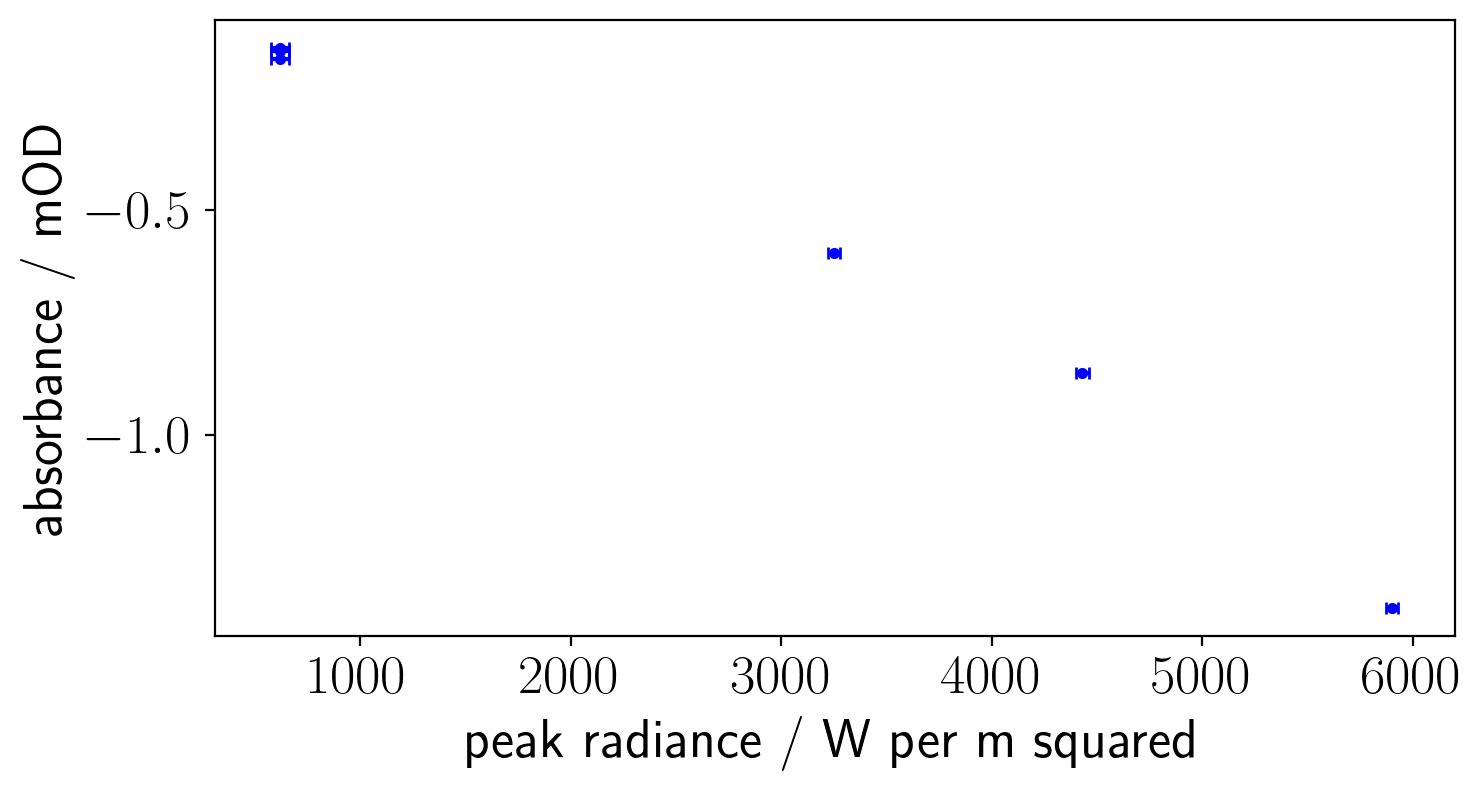

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
from scipy import io
import numpy as np
import json

plt.rcParams['text.usetex'] = True
font = {'size': 20}
plt.rc('font', **font)
#From 2023.12.22 PumpPowerVar in pump 653 Probe 680
#2nd-x;170.98460380387596;4.882207633023595;1.0;0.0;3.5228
#2nd-x Error;0.044586461622659335;0.10565856496080137;60.88881374774401;1.876611874015875;3.5228
#2nd-y;123.76193757659699;5.398671742339542;1.0;0.0;3.5228
#2nd-y Error;0.007988920725724555;0.018944810621290376;10.67173147785706;0.31277821947196766;3.5228

file = open(r"c:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar\TAfitPump653Probe680_OUTPUT.JSON")
entries = json.load(file)['entries']
entries_files = []
dOD = []
for entry in entries:
    entries_files.append(entry['inputFile'])
    dOD.append([entry['popt'][2], entry['pcov'][2][2]])

dOD = np.array(dOD)
dOD[dOD == np.inf] = np.NaN
#print(dOD)
#these are in order
pumpRad = np.array([[620, 43], [620, 43], [620, 43], [3250, 30], [4430,30], [5900, 30], [4430, 30], [4430, 30], [4430, 30]])
probeRad = np.array([[910, 100], [1820, 60], [460, 100], [460, 100], [460, 100], [460, 100], [910, 60], [3640, 20], [1820, 30]])


#try calculating a fun correction factor based on the first 3 measurements that have identical pump radiance
#need to take the times such as done in degradation
io.loadmat(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar\saturation_2023-12-22_11-47.mat")

linParameter = np.polyfit(pumpRad[:3,0], dOD[:3,0], 1)

#print(pumpRad[])
#Plot first 6 points as they should have relatively little sample degradation, because of their order and the pump power
fig, ax = plt.subplots(1,2, figsize=(8,4), dpi = 200)
ax[0].plot(pumpRad[:6,0], dOD[:6,0], 'b.')
#yerror of dOD fitting is not sensible
ax[0].errorbar(pumpRad[:6,0], dOD[:6,0], xerr = pumpRad[:6,1], ls = "None", ecolor = 'b', capsize = 2)
ax[0].set_xlabel('peak radiance / W per m squared')
ax[0].set_ylabel('absorbance / mOD')
plt.show()

### Degradation

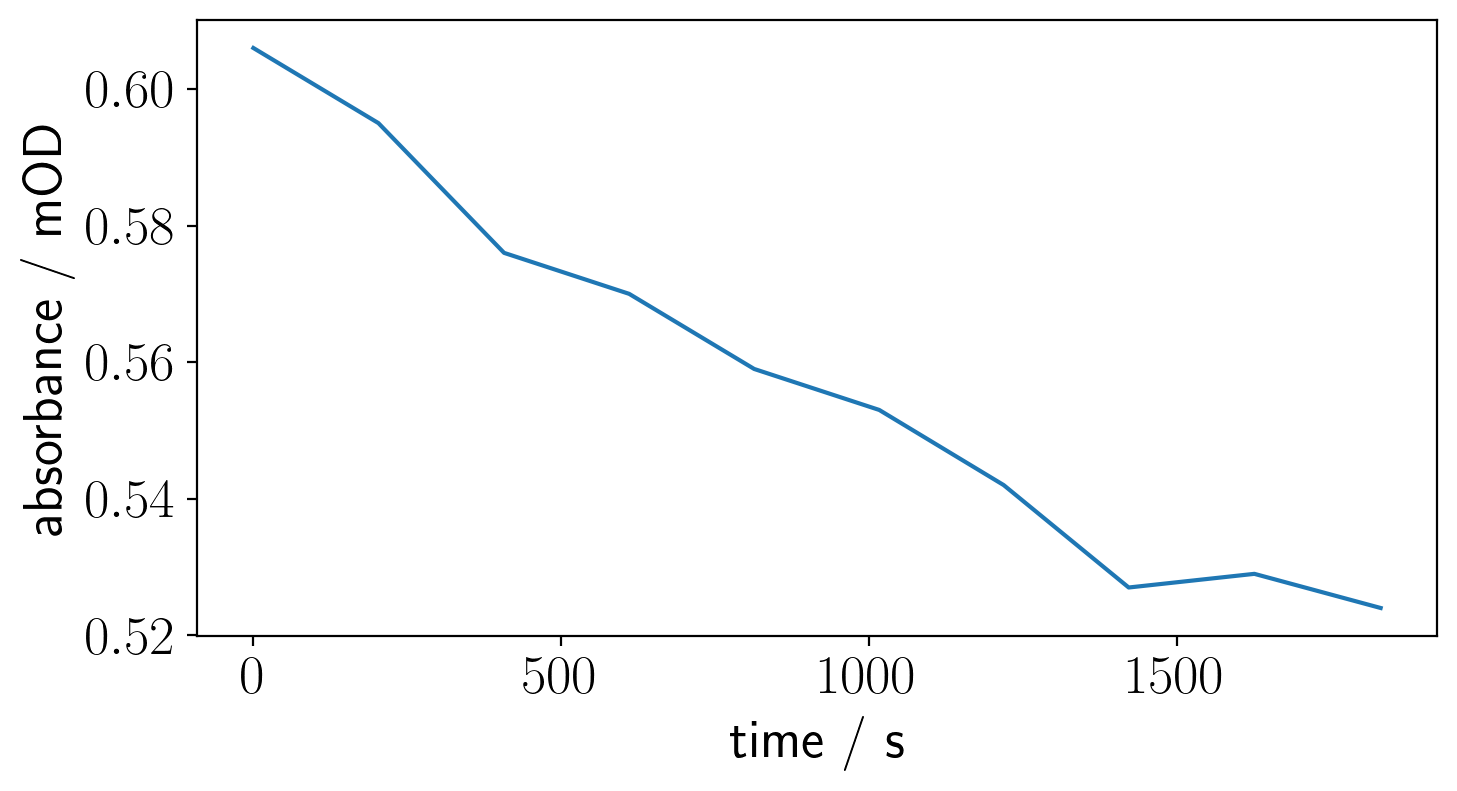

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
import numpy as np
from datetime import timedelta

plt.rcParams['text.usetex'] = True
font = {'size': 20}
plt.rc('font', **font)

def parseTime(time):
    '''takes time in hh:mm:ss and returns a value in s'''
    times = np.zeros(len(time), dtype = int)
    hh, mm, ss = str(time[0]).split(":")
    times[0] = int(hh)*3600+int(mm)*60+int(ss)
    for i in range(len(time)-1):
        hh, mm, ss = str(time[i+1]).split(":")
        times[i+1] = int(hh)*3600+int(mm)*60+int(ss) - times[0]

    times[0] = 0
    return times
    
def degradationCompensation(degradePerSecond, filepathArray, powerDensities):
    '''returns correction factor for each measurement\\
        degradePerSecond is a linear fit of degradation per second per W/m^2 peak\\
        filepathArray is ordered array of measurements after each other\\
        powerdensities is either a single number (int/float) or array of powerdensities of size of filepathArray\\
        not optimal but a linear approximation is about as good as I can do it with the data available'''
    from scipy import io 
    timesInSecond = np.zeros(len(filepathArray))
    for path in filepathArray:
        #need to differentiate between the summary of TA scans and TA scans
        #do not mix and match please
        try:
            tempLoad = io.loadmat(path)
            #test if file has keys for single TA measurement
            if 'delay' in tempLoad.keys() and 'd_vec' in tempLoad.keys():
                #this part can easily be broken by a matlab update
                #load time
                timeString = tempLoad['__header__'].split("Created on: ")[1]
                timeString = timeString.split(' ')[2]
                print(timeString)
                hh, mm, ss = timeString.split(':')
            elif 'dates' in tempLoad.keys():
                subDates = tempLoad['dates'][:][3:6]
                for timeArray in subDates:
                    hh = timeArray[0]
                    mm = timeArray[1]
                    ss = timeArray[2]
                    #continues here
                


        except: 
            print("dooters")

powerVar = pd.read_excel("CorrectedPump653ProbeWavelengthScan_UV-extended.xlsx", sheet_name='Degradation493nm')
dtime = parseTime(powerVar['time'])
dOD = powerVar['dOD / mOD']

fig, ax = plt.subplots(1,1, figsize=(8,4), dpi = 200)
ax.plot(dtime, dOD)
ax.set_xlabel('time / s')
ax.set_ylabel('absorbance / mOD')
plt.show()